In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Question 1a
def Random_dA(N, R):
    dApolar = np.array([np.sqrt(np.random.uniform(0,R**2,N)), np.random.uniform(0,2*np.pi,N)]) 
    dAcenter = np.transpose([dApolar[0]*np.cos(dApolar[1]), dApolar[0]*np.sin(dApolar[1]), np.zeros(N)])
    return dAcenter

#Question 4a (Bonus)
def Ordered_dA(dx, R):
    XYcoordinates = np.mgrid[-R:R:dx, -R:R:dx].reshape(2,-1).T
    dAsquare = np.zeros((len(XYcoordinates),3))
    dAsquare[:,:-1] = XYcoordinates
    dAcenter = np.array([dA for dA in dAsquare if np.sqrt(dA[0]**2 + dA[1]**2) <= R])
    return dAcenter

#Question 1(b,c)
def BField(R, q, vy, mu0, R_particle, dAcenter):
    velocity = np.tile(np.array([0, vy, 0]), (len(dAcenter),1))
    ParticlePos = np.tile([2*R_particle, 0, 0], (len(dAcenter),1))
    distanceR = np.sqrt((dAcenter[:,1]-ParticlePos[:,1])**2 + (dAcenter[:,0]-ParticlePos[:,0])**2 + (dAcenter[:,2]-ParticlePos[:,2])**2)
    Bfielddotn = mu0/(4*np.pi)*q * np.cross(velocity, dAcenter-ParticlePos)[:,2]/(distanceR)**3 #We only care about the z component of the cross product
    dPhi = Bfielddotn*(np.pi*(R**2)/len(dAcenter))
    Flux = np.sum(dPhi)
    return Bfielddotn, dPhi, Flux

#Question 3a
def MCstep(N, N_repeats, R, q, vy, mu0, R_particle):
    Flux = np.array([BField(R, q, vy, mu0, R_particle, Random_dA(N, R))[2] for i in range(N_repeats)])
    return np.mean(Flux), np.std(Flux) #Returns the mean and standard deviation of the flux


Question 2a \
If we increase the particle's distance to the ring, we would expect that the total flux though the ring decreases, since we divide by $r^3$.

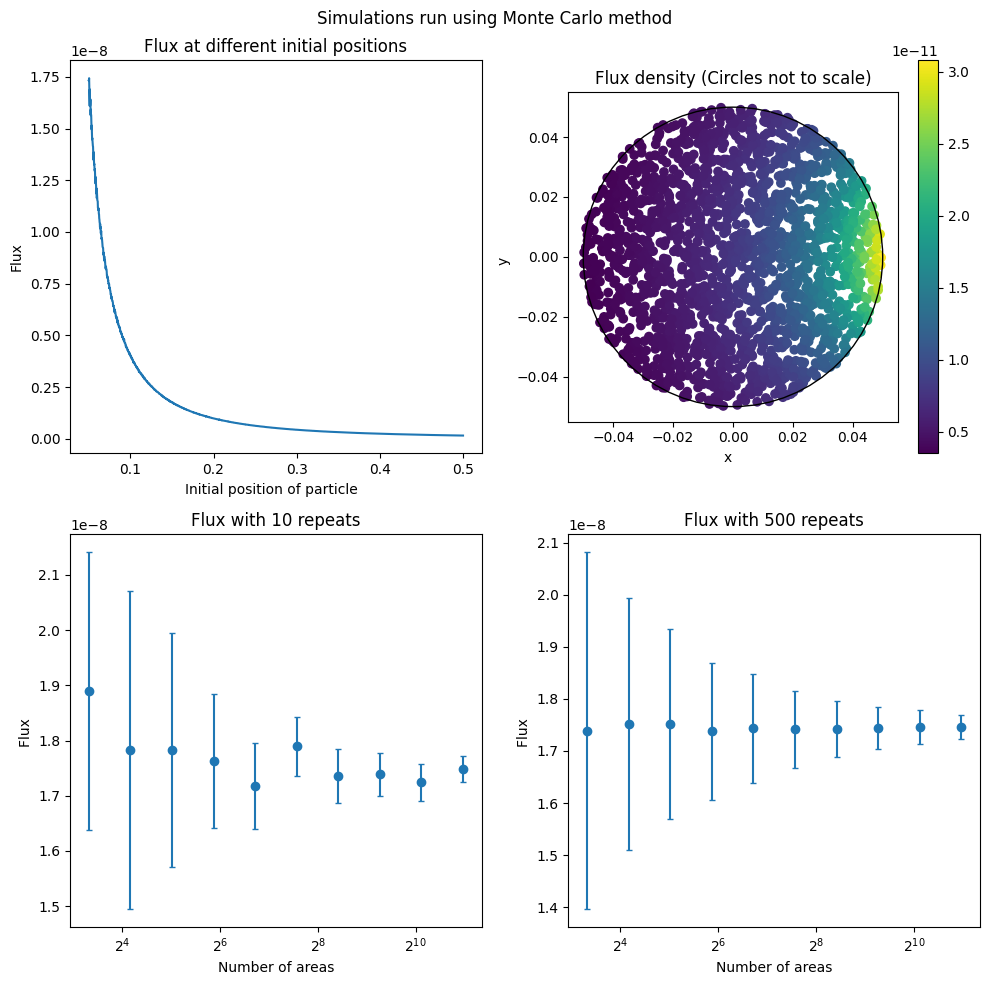

In [3]:
N, R, q, vy, mu0, R_particle = 2000, 0.05, 2*10**(-4), 10**3, 4*np.pi*10**(-7), 0.05

fig, axs = plt.subplots(2, 2, figsize = (10,10))
fig.set_tight_layout(True)
fig.suptitle("Simulations run using Monte Carlo method")

#Question 2a
Par_initpos = np.linspace(R, 10*R, N) #We want to plot the flux for x = R to x = 10R
axs[0][0].plot(Par_initpos, [BField(R, q, vy, mu0, i, Random_dA(N, R))[2] for i in Par_initpos])
axs[0][0].set_xlabel("Initial position of particle  ")
axs[0][0].set_ylabel("Flux")
axs[0][0].set_title("Flux at different initial positions")


#Question 2b
dAcenter = Random_dA(N, R)
dB, dPhi, Flux = BField(R, q, vy, mu0, R, dAcenter)
plt.colorbar(axs[0][1].scatter(dAcenter[:,0], dAcenter[:,1], c = dPhi), ax = axs[0][1])

large_circle = plt.Circle((0,0), R, fill = False)
axs[0][1].add_patch(large_circle)
axs[0][1].set_aspect(1)
axs[0][1].set_xlim(-R*1.1, R*1.1)
axs[0][1].set_ylim(-R*1.1, R*1.1)
axs[0][1].set_title("Flux density (Circles not to scale)")
axs[0][1].set_xlabel("x  ")
axs[0][1].set_ylabel("y  ")

#Question 3b
N = np.logspace(np.log2(10), np.log2(2000), num=10, base = 2)
N_repeats = [10, 500]
for i in range(len(N_repeats)): #We want to plot the flux for both 10 and 500 repeats
    avgFlux, avgFlux_err = [], []
    for n in N: #We run the MCstep function for different number of particles
        Flux, Flux_err = MCstep(int(n), N_repeats[i], R, q, vy, mu0, R)
        avgFlux.append(Flux)
        avgFlux_err.append(Flux_err)
    axs[1][i].errorbar(N, avgFlux, yerr = avgFlux_err, fmt = 'o', capsize = 2)
    axs[1][i].set_xscale('log', base = 2)
    axs[1][i].set_title(f"Flux with {N_repeats[i]} repeats")
    axs[1][i].set_xlabel("Number of areas")
    axs[1][i].set_ylabel("Flux ")

plt.show()

Question 3c \
It is obvious that the mean flux varies a lot more for N_repeats = 10 than for 500. This suggests that 10 is too small, while 500 might be too large, depending on the application. \
The SEM is very large for a low number of particles, but around $N=10^2$, it seems to stabilize.

Question 4

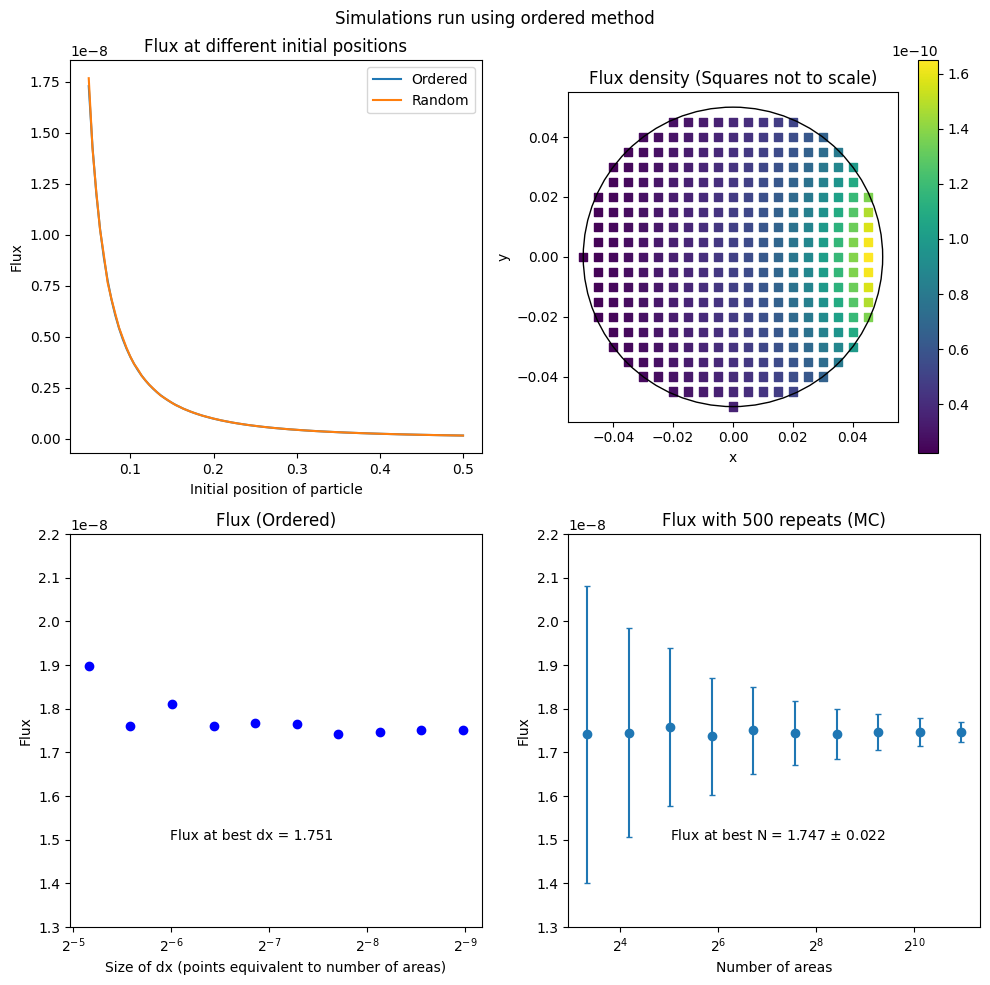

In [4]:
N, R, q, vy, mu0, R_particle, dx = 2000, 0.05, 2*10**(-4), 10**3, 4*np.pi*10**(-7), 0.05, 0.005

fig, axs = plt.subplots(2, 2, figsize = (10,10))
fig.set_tight_layout(True)
fig.suptitle("Simulations run using ordered method")

Par_initpos = np.linspace(R, 10*R, 100) #We want to plot the flux from x = R to x = 10R
axs[0][0].plot(Par_initpos, [BField(R, q, vy, mu0, i, Ordered_dA(dx, R))[2] for i in Par_initpos], label = "Ordered")
axs[0][0].plot(Par_initpos, [BField(R, q, vy, mu0, i, Random_dA(N, R))[2] for i in Par_initpos], label = "Random")
axs[0][0].set_xlabel("Initial position of particle")
axs[0][0].set_ylabel("Flux")
axs[0][0].set_title("Flux at different initial positions")
axs[0][0].legend()

#Question 2b
dAcenter = Ordered_dA(dx, R)
dB, dPhi, Flux = BField(R, q, vy, mu0, R, dAcenter)
plt.colorbar(axs[0][1].scatter(dAcenter[:,0], dAcenter[:,1], c = dPhi, marker = "s"), ax = axs[0][1])

large_circle = plt.Circle((0,0), R, fill = False)
axs[0][1].add_patch(large_circle)
axs[0][1].set_aspect(1)
axs[0][1].set_xlim(-R*1.1, R*1.1)
axs[0][1].set_ylim(-R*1.1, R*1.1)
axs[0][1].set_title("Flux density (Squares not to scale)")
axs[0][1].set_xlabel("x")
axs[0][1].set_ylabel("y")

# Repeating question 3b for 500 repeats
N = np.logspace(np.log2(10), np.log2(2000), num=10, base = 2)
N_repeats = [10, 500]
i = 1
avgFlux, avgFlux_err = [], []
for n in N: #We run the MCstep function for different number of particles
    Flux, Flux_err = MCstep(int(n), N_repeats[i], R, q, vy, mu0, R)
    avgFlux.append(Flux)
    avgFlux_err.append(Flux_err)
    if n == N[-1]:
        axs[1][i].text(2**5*1.01, 1.5*10**(-8), f"Flux at best N = {round(Flux*10**8,3)} $\pm$ {round(Flux_err*10**8,3)}")
axs[1][i].errorbar(N, avgFlux, yerr = avgFlux_err, fmt = 'o', capsize = 2)
axs[1][i].set_xscale('log', base = 2)
axs[1][i].set_title(f"Flux with {N_repeats[i]} repeats (MC)")
axs[1][i].set_xlabel("Number of areas")
axs[1][i].set_ylabel("Flux")
axs[1][i].set_ylim(1.3*10**(-8), 2.2*10**(-8))

#Plotting the flux for different sizes of dx, which are calculated based on N
dX = np.sqrt(np.pi*(R**2)/N)
avgFlux, avgFlux_err = [], []
for dx in dX:
    axs[1][0].plot(dx, BField(R, q, vy, mu0, R, Ordered_dA(dx, R))[2], 'o', c = 'b')
    if dx == dX[-1]:
        axs[1][0].text(2**(-6)*1.01, 1.5*10**(-8), f"Flux at best dx = {round(BField(R, q, vy, mu0, R, Ordered_dA(dx, R))[2]*10**8,3)}")
axs[1][0].set_xscale('log', base = 2)
axs[1][0].set_title(f"Flux (Ordered)")
axs[1][0].set_xlabel("Size of dx (points equivalent to number of areas)")
axs[1][0].set_ylabel("Flux")
axs[1][0].set_ylim(1.3*10**(-8), 2.2*10**(-8))
axs[1][0].invert_xaxis()

plt.show()

If we look at the first plot, we see that the fluxes from the two methods are pretty much identical. \
For the ordered method, we observe basically the same fluctuations as in the previous question. \
Also, the flux at the most precise simulation from the ordered method is well within the errors from the MC method. \
This all suggests that the two methods are equally good, at least for the more precise simulations.

0.4999603836765332